# Acetic Acid H0 Values

the paper has a series of three acidity levels: 4,5 and 6% in 80% acetic acid. I decided to plot the rates vs the H0 value. The closest series of H0 values that I could find was from...

"The Acidity Scale in Glacial Acetic Acid. I. Sulfuric Acid Solutions. $-6 < H_0 < 0$" N.F. Hall, W.F. Spengeman, J. Am.Chem. Soc., 1940, 62, 2487-2492. https://doi.org/10.1021/ja01866a062

This is for H2SO4 in 100% acetic acid. Hopefully the difference between the three values will be similar between 80% and 100% acetic acid. Perhaps you will find a better H0 source.

4 -2.381957468345116
5 -2.461899201085652
6 -2.5418409338261876


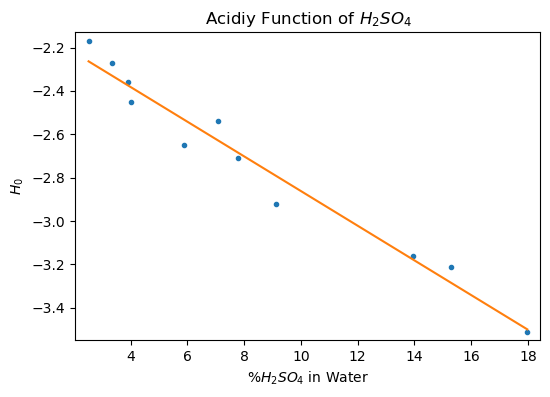

    %H2SO4    H0                           indicator  indicator_pKa
0    0.031  0.09             4-chloro-2-nitroaniline          -0.91
1    0.050 -0.14             4-chloro-2-nitroaniline          -0.91
2    0.097 -0.49             4-chloro-2-nitroaniline          -0.91
3    0.193 -0.76             4-chloro-2-nitroaniline          -0.91
4    0.385 -1.09             4-chloro-2-nitroaniline          -0.91
..     ...   ...                                 ...            ...
57  41.450 -5.33  N,N-Dimethyl-2,3,6-trinitroaniline          -4.73
58  43.710 -5.57  N,N-Dimethyl-2,3,6-trinitroaniline          -4.73
59   0.030  0.05                      2-nitroaniline          -0.17
60   0.055 -0.30                      2-nitroaniline          -0.17
61   0.090 -0.60                      2-nitroaniline          -0.17

[62 rows x 4 columns]


In [22]:
file_path = ""
file_name = "AceticAcid_H2SO4_H0_Values.csv"  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### READ DATA

df = pd.read_csv(file_path+file_name, skipinitialspace=True, comment='#') 
#display(df)

#df.sort_values(by=['%H2SO4'], inplace=True)
#display(df)

y = df['H0']
x = df['%H2SO4']

### PICK DATA NEAR 5% H2SO4 TO GET SHORT LINEAR REGION OF PLOT

y = y[8:19]
x = x[8:19]

style_file_path = ""
style = "S2_classic2.mplstyle"
#plt.style.use(style_file_path+style)        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  

ax.set(title=r"Acidiy Function of $H_2SO_4$",       
       ylabel=r"$H_0$", 
       xlabel="%$H_2SO_4$ in Water",                
#       xlim=[2,10],                  
#       ylim=[17,21.5]
      )                   

ax.margins(x=.03, y=.03, tight=True)
plt.plot(x,y,".")

line = linregress(x,y)
plt.plot(x,line.slope*x+line.intercept)


### CALCULATE THE AVERAGE H0 VALUE ALONG THE LINE FIT

H04 = line.slope*4+line.intercept
H05 = line.slope*5+line.intercept
H06 = line.slope*6+line.intercept

print("4", H04)
print("5", H05)
print("6", H06)
plt.show()
print(df)

The three values were used in the plot in the next notebook.

    Mole_Fraction        H0       H2SO4
0        0.002820  -0.95071    1.517832
1        0.005500  -0.46448    2.926106
2        0.021035   0.32854   10.482875
3        0.046783   1.09571   21.103517
4        0.085346   2.01612   33.710671
5        0.149528   3.24299   48.932794
6        0.206007   4.29091   58.575615
7        0.288094   5.56852   68.803708
8        0.365050   6.74388   75.806600
9        0.398362   7.12694   78.301440
10       0.464975   7.84187   82.567567
11       0.539220   8.42863   86.445787
12       0.618568   8.96407   89.835598
13       0.705548   9.42254   92.887106
14       0.825790  10.00812   96.273401
15       0.884631  10.31374   97.662984
16       0.940930  10.67061   98.861228
17       0.981964  11.25823   99.664122
18       1.000000  11.87203  100.000000
4 0.3517838034256297
5 0.24684212095101465
6 0.14190043847639955


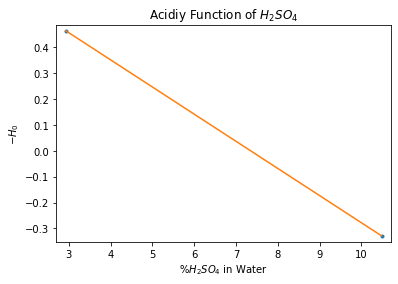

In [2]:
file_path = ""
file_name = "Sulfuric_Acid.csv"  

## This data is from "Acidity functions: an update", Robin A. Cox and Keith Yates, Can. J. Chem., 1983, 61, 2225-2243 https://doi.org/10.1139/v83-388
## Scanned and digitized from figure 1
##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### READ DATA

df = pd.read_csv(file_path+file_name, skipinitialspace=True, comment='#') 
#display(df)

mmassH2SO4 = 98.1
mmassH2O = 18

Mole_Fraction = df["Mole_Fraction"]

fH2SO4 = Mole_Fraction
fH2O = 1- Mole_Fraction

df['H2SO4'] = fH2SO4*mmassH2SO4 / (fH2SO4*mmassH2SO4 + fH2O*mmassH2O)*100
print(df)
#df.sort_values(by=['%H2SO4'], inplace=True)
#display(df)

y = -df['H0']
x = df['H2SO4']

### PICK DATA NEAR 5% H2SO4 TO GET SHORT LINEAR REGION OF PLOT

y = y[1:3]
x = x[1:3]

style_file_path = ""
style = "S2_classic2.mplstyle"
#plt.style.use(style_file_path+style)        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  

ax.set(title=r"Acidiy Function of $H_2SO_4$",       
       ylabel=r"$-H_0$", 
       xlabel="%$H_2SO_4$ in Water",                
#       xlim=[2,10],                  
#       ylim=[17,21.5]
      )                   

ax.margins(x=.03, y=.03, tight=True)
plt.plot(x,y,".")

line = linregress(x,y)
plt.plot(x,line.slope*x+line.intercept)


### CALCULATE THE AVERAGE H0 VALUE ALONG THE LINE FIT

H04 = line.slope*4+line.intercept
H05 = line.slope*5+line.intercept
H06 = line.slope*6+line.intercept

print("4", H04)
print("5", H05)
print("6", H06)
plt.show()